# Exploratory data analysis

In [7]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from source.utils.dataHandler import DataHandler

In [8]:
data_handler = DataHandler('../data/data_clean.csv')

In [9]:
data_handler.get_data().head()

,db_sc,id_sc,pv,data,cassa,cassiere,num_scontrino,ora,tessera,t_flag,...,liv4,descr_liv4,liv5,descr_liv5,liv6,descr_liv6,tipologia,descr_tipologia,cod_rep,descr_rep
0,sysevo,52597225,4653,2023-03-25,2,2,248,21:08:00,NaN,V,...,2070201,ARANCIATA ZUCCHERO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,1,ALIMENTARE
1,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,1180203,PARZIALMENTE SCREMATO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,1,ALIMENTARE
2,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,5040402,VASCHETTE,NaN,NaN,NaN,NaN,NO,Prodotti Normali,5,CURA CASA
3,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,3080203,PASTA SFOGLIA,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,3,BANCO LIBERO SERVIZIO
4,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,3080203,PASTA SFOGLIA,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,3,BANCO LIBERO SERVIZIO


## 1. Distribution of sales by product

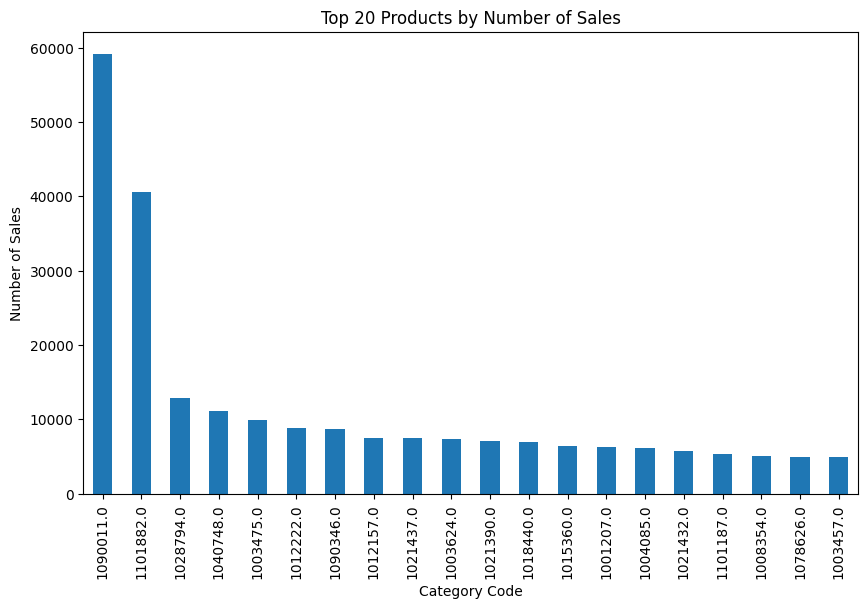

In [10]:
data_handler.distribSales()

## 2. Frequency of customer purchases

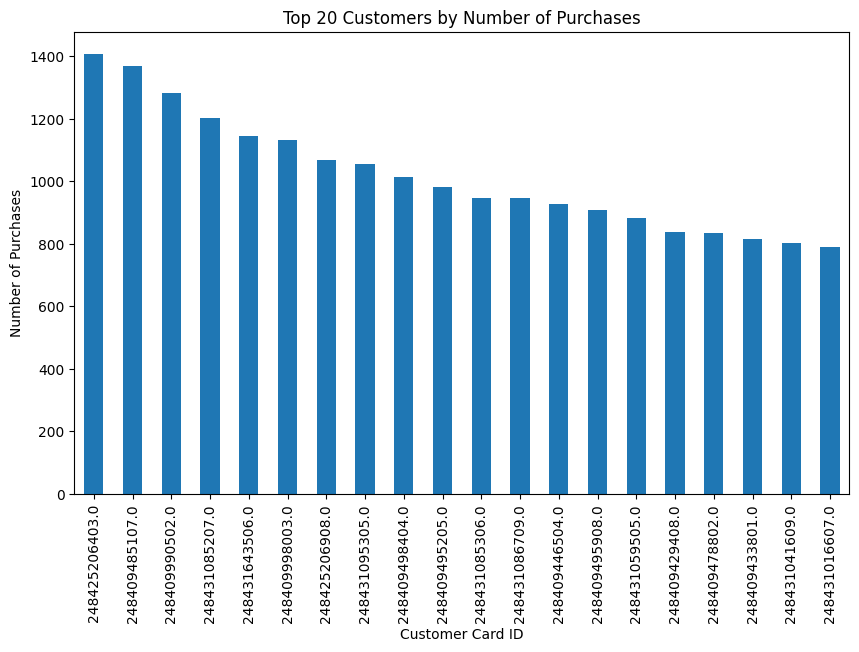

In [11]:
data_handler.freqCustPurch()

## 3. Identification of temporal patterns in sales

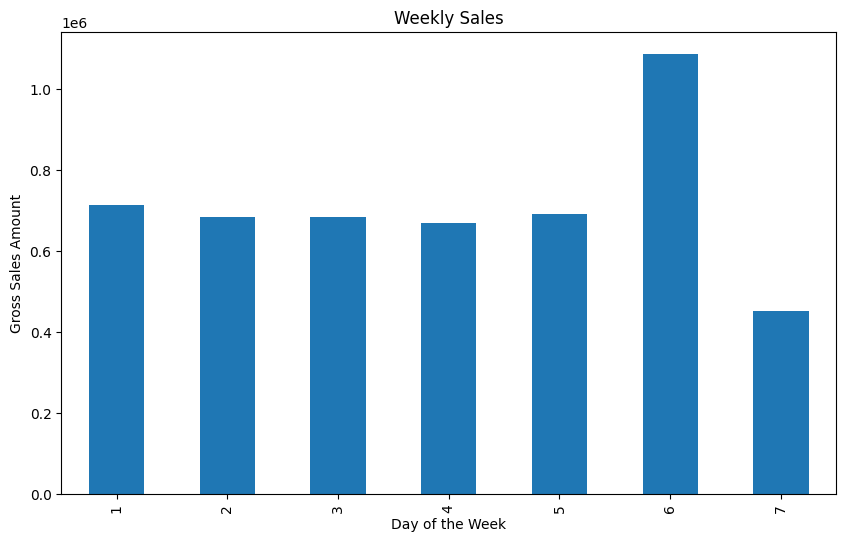

In [12]:
data_handler.plot_sales()